# ECE 57000 Assignment 2 Exercises



Name:

# Important submission information

1. Follow the instructions in the provided "uploader.ipynb" to convert your ipynb file into PDF format.
2. Please make sure to select the corresponding pages for each exercise when you submitting your PDF to Gradescope. Make sure to include both the **output** and the **code** when selecting pages. (You do not need to include the instruction for the exercises)


**We may assess a 20% penalty for those who do not correctly follow these steps.**

# 1. Task description & Background
## 1-1. Task description

In this assignment, students will implement Stochastic Gradient Descent (SGD) for logistic regression and apply backpropagation for gradient descent/SGD on neural networks. You are only allowed to use basic functions or equivalent operations of NumPy package. The dataset from Assignment 1 will be reused.

For the first part (logistic regression), students will define the model, loss function, compute gradients, and implement the SGD algorithm. In the second part, students will implement GD/SGD for a three-layer neural network, focusing on the forward pass and backpropagation.

## 1-2. Background on dataset
In this assignment, we will explore the application of logistic regression to a binary classification problem in the field of medical diagnostics similar to the first assignment. The objective is to predict whether a breast tumor is benign or malignant based on features extracted from digitized images of fine needle aspirate (FNA) of breast mass.

The dataset used is the Breast Cancer dataset from the UCI Machine Learning Repository, incorporated into scikit-learn as `load_breast_cancer`. This dataset includes measurements from 569 instances of breast tumors, with each instance described by 30 numeric attributes. These features include things like the texture, perimeter, smoothness, and symmetry of the tumor cells.

You will split the data into training and test sets, with 80% of the data used for training and the remaining 20% for testing. This setup tests the model’s ability to generalize to new, unseen data. We set the `random_state` as 42 to ensure reproducibility. The logistic regression model, initialized with the 'liblinear' solver, will be trained on the training set.



# 2. Loading and preprocessing data from the previous assignment


You can load the Breast Cancer dataset by using [this function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from the `sklearn.datasets` module (we have imported the function for you). Refer to the official documentation to understand more about this function.

**Implement the Following:**
1.  `data`: Use the built-in function to load the dataset and store it in this variable.
2.  `X`: This should store the feature matrix from the dataset.
3.  `y`: This should store the target vector, which includes the labels indicating whether the tumor is benign or malignant.

`X_train, X_test, y_train, y_test`: Split `X` and `y` into training and testing sets.
   - Set `test_size` to 0.2, allocating 20% of the data for testing.
   - Use `random_state=42` to ensure that your results are reproducible.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X, y = data.data, data.target
print(f'The data has a shape of {X.shape}, and the target has a shape of {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'The training set has {X_train.shape[0]} datapoints and the test set has {X_test.shape[0]} datapoints.')

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(f'The max of training data is {X_train.max():.2f} and the min is {X_train.min():.2f}.')


The data has a shape of (569, 30), and the target has a shape of (569,)
The training set has 455 datapoints and the test set has 114 datapoints.
The max of training data is 1.00 and the min is 0.00.


# 3. Initialize and train the logistic regression model with SGD (60/100 points)


You will initialize and train a logistic regression model.


## 3-1. Defining sigmoid function and binary cross entropy function (10/100 points)
**Implement the Following:**
1. Sigmoid function: Implement the sigmoid function, which takes in a scalar or vector and returns the sigmoid of the input.
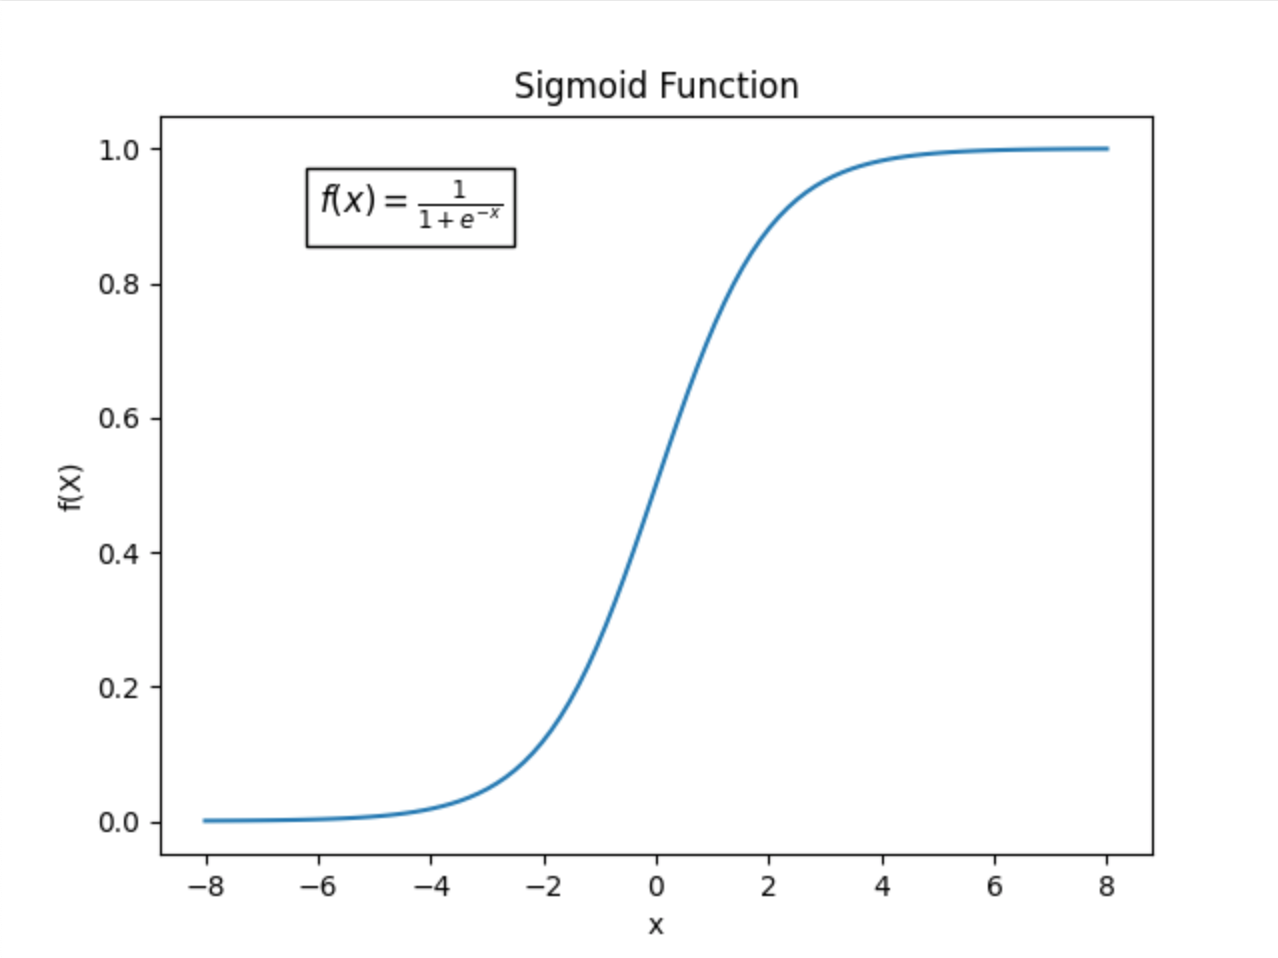
2. Binary Cross-Entropy Loss: Implement the binary cross-entropy loss function, which takes in the predictions and the true labels and returns the loss value. It is formulated as $\ell(y,\hat{y})=-\frac{1}{N} \sum_{n=1}^{N} \left[ y_n( \log \hat{y}_n ) + (1-y_n) \log (1-\hat{y}_n) \right]$.

y_n = true, hat{y}_n = pred

Please implement by using basic functions in numpy.
Ensure your code is placed between the comments `<Your code>` and `<end code>`. This structure is intended to keep your implementation organized and straightforward.


In [3]:
import numpy as np
# initialize numpy random seed
np.random.seed(29)

# Sigmoid function for logistic regression
def sigmoid(z):
    # <Your code>
    return 1/(1+np.exp(-z))
    # <end code>

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    # <Your code>
    
    # Avoid log(0) by clipping predictions (clipping:  restricting the predicted probability values to a certain range)
    y_pred = np.clip(y_pred, 1e-5, np.max(y_pred)) # the value under 1e-5 will all become 1e-5, with no upper limit
    N = len(y_true)
    loss = -1/N * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss

    # <end code>

## 3-2. Defining a class `LogisticRegression` based on SGD (50/100 points)

**Implement the Following:**
1. Initialize Parameters: Implement `initialize_weights` function. Use zero initialization for `weights` and `bias`.

2. predict function: Implement the predict function, which takes in the feature matrix `X` and returns the predicted value. Assuming $W \in \mathbb{R}^{D}$, $X \in \mathbb{R}^{N \times D}$, $b \in \mathbb{R}^{1}$, the linear model is defined as $\sigma(XW + b)$, where $\sigma$ is sigmoid function.

3. fit function: Implement the fit function, which trains the logistic regression model using SGD. The function should take in the feature matrix `X`, the true labels `y`, the learning rate `lr`, and the number of epochs `n_epochs`. In specific, first, at every epoch, you may shuffle indices of `n_samples` and reorganize the order of `X` and `y` to make sure that the order is randomized per epoch. Second, make a for loop for SGD. You may want to make a small batch data like `X_batch` and `y_batch`. Third, inside of the for loop for SGD, make a prediction by using the `predict` function you implemented. Fourth, compute the gradient with respect to `weights` and with respect to `bias`. Fifth, use the gradient to update `weights` and `bias`. In other words, implement the SGD algorithm $w^{(1)}=w^{(0)}-\alpha \nabla_w (\text{BCE} (y, \hat{y} ) )$ and $b^{(1)}=b^{(0)}-\alpha \nabla_b ( \text{BCE} ( y,\hat{y} ))$, where $\alpha$ is a learning rate and $\hat{y}$ is the prediction $\sigma(XW + b)$. BCE indicates binary cross entropy loss.

You are encouraged to experiment with different architectures and learning rates to see how they affect the performance of the model.   
Make sure you get accuracy greater than **0.85** on the test set.

In [3]:
class LogisticRegression_SGD:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    # Initialize weights
    def initialize_weights(self, n_features):
        """
        Initializes weights and bias to zero.

        :param n_features: Number of input features
        """
        # <Your code>

        # Zero initialization for weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # <end code>


    # Prediction function
    def predict(self, X):
        # the linear model is defined as sigma(XW + b), where sigma is sigmoid function.
        # <Your code>

        # X*self.weight provide element wise multiplication, which means they must have the same shape. In this situation, we need dot for matrix multiplication       
        y_pred = sigmoid(np.dot(X, self.weight) + self.bias)
        return y_pred
    
        # <end code>

    # Training function using mini-batch SGD
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
fit function: Implement the fit function, which trains the logistic regression model using SGD. The function should take in the feature matrix `X`, the true labels `y`, the learning rate `lr`, and the number of epochs `n_epochs`. In specific, first, at every epoch, you may shuffle indices of `n_samples` and reorganize the order of `X` and `y` to make sure that the order is randomized per epoch. Second, make a for loop for SGD. You may want to make a small batch data like `X_batch` and `y_batch`. Third, inside of the for loop for SGD, make a prediction by using the `predict` function you implemented. Fourth, compute the gradient with respect to `weights` and with respect to `bias`. Fifth, use the gradient to update `weights` and `bias`. In other words, implement the SGD algorithm $w^{(1)}=w^{(0)}-\alpha \nabla_w (\text{BCE} (y, \hat{y} ) )$ and $b^{(1)}=b^{(0)}-\alpha \nabla_b ( \text{BCE} ( y,\hat{y} ))$, where $\alpha$ is a learning rate and $\hat{y}$ is the prediction $\sigma(XW + b)$. BCE indicates binary cross entropy loss.
        for epoch in range(self.epochs):
            # Shuffle the data
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            if epoch == 0:
              loss = binary_cross_entropy(y, self.predict(X))
              print("SGD loss")
              print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

            for i in range(0, n_samples, self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                # <Your code>

                # Predictions                


                # Compute gradients


                # Update weights


                # <end code>

            # Calculate loss for monitoring
            loss = binary_cross_entropy(y, self.predict(X))
            if (epoch + 1) % 10 == 0:
              print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

In [ ]:
# You are encouraged to experiment with different architectures and learning rates to see how they affect the performance of the model.
# Training the model
model_SGD = LogisticRegression_SGD(learning_rate=0.1, epochs=100, batch_size=16)
model_SGD.fit(X_train, y_train)

In [ ]:
# Code to check accuracy of your implementation
from sklearn.metrics import accuracy_score

predictions = model_SGD.predict(X_test)
predictions = (predictions > 0.5).astype(int)
print(predictions)
print(y_test)
accuracy = accuracy_score(y_test, predictions)

print(f'The accuracy is {accuracy:.4f}')

# 4. 3-Layer Neural Network with SGD (40/100 points)


Now, we extend our 1-layer neural network to 3-layers neural network.

**Implement the Following:**

Ensure your code is placed between the comments `<Your code>` and `<end code>`. This structure is intended to keep your implementation organized and straightforward.




## 4-1. Defining activation functions and the derivative (10/100 points)

**Implement the Following:**
1. relu function: Implement the ReLU activation function, which takes in a scalar or vector and returns the ReLU of the input.
2. relu_derivative function: Implement the derivative of the ReLU activation function, which takes in a scalar or vector and returns the derivative of the ReLU of the input.
3. sigmoid function: Implement the sigmoid activation function, which takes in a scalar or vector and returns the sigmoid of the input.

In [6]:
def relu(z):
    """ReLU activation function."""
    # <Your code>

    # <end code>

def relu_derivative(z):
    """Derivative of ReLU activation function."""
    # <Your code>

    # <end code>

def sigmoid(z):
    """Sigmoid activation function."""
    # <Your code>
    
    # <end code>


## 4-2. Defining 3-layer Neural Network (30/100 points)

**Implement the Following:**

1. Initialize Parameters: Implement `initialize_weights` function. Implement Kaiming initialization to initialize `weights`. Use zero initialization for `bias`.

2. forward function: Compute the pre-activation for each layer by multiplying inputs or previous activations with weights and adding biases. Apply the ReLU activation function for hidden layers and the Sigmoid function for the output layer. Finally, return the activated output of the network. The formulation of forward function can be defined as:

$$\sigma(\text{relu}(\text{relu}(XW_1+b_1)W_2+b_2)W_3+b_3)$$

3. backward function:
    1. **Compute Gradient of Loss**: Calculate the gradient of the loss with respect to the network's output.
    2. **Compute Gradients for Weights and Biases**: Use the gradients from the output to compute the gradients of weights and biases at each layer, applying the activation function's derivative where needed.
    3. **Propagate Gradients Backward**: Continue to backpropagate the gradients through the network, adjusting calculations as you move from one layer to the previous.
    4. **Update Parameters**: Update all weights and biases using the calculated gradients and learning rate.

    This backpropagation adjusts the model parameters to minimize the loss.

4. predict function: Implement the predict function, which takes in the feature matrix `X` and returns the predicted class (0 or 1).

You are encouraged to experiment with different architectures and learning rates to see how they affect the performance of the model.

Make sure you get accuracy greater than **0.75** on the test set.

In [7]:
# Neural Network Model with an additional hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01, epochs=100, batch_size=32):
        """
        Initialize the Neural Network with given parameters.
        :param input_size: Number of input features
        :param hidden_size1: Number of neurons in the first hidden layer
        :param hidden_size2: Number of neurons in the second hidden layer
        :param output_size: Number of output neurons (1 for binary classification)
        :param learning_rate: Learning rate for weight updates
        :param epochs: Number of training iterations
        :param batch_size: Size of mini-batches for SGD
        """
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.initialize_weights()

    def initialize_weights(self):
        """Initialize weights and biases using Kaiming initialization."""

        # <Your code>
        # Kaiming initialization for the first layer weights

        
        # Kaiming initialization for the second layer weights

        
        # Kaiming initialization for the third layer weights

        
        # <end code>


    def forward(self, X):
        """
        Forward pass through the network.
        :param X: Input data
        :return: Activated output of the network
        """
        # <Your code>

        

        # <end code>

    def backward(self, X, y, output):
        """
        Backpropagation to compute gradients and update weights.
        :param X: Input data
        :param y: True labels
        :param output: Predicted output from forward pass
        """
        m = X.shape[0]

        # Gradient of loss w.r.t. output (binary cross-entropy with sigmoid activation)
        dZ3 = output - y[:,None]  # Gradient wrt Z3 when using sigmoid activation at output


        # <Your code>
        # Gradients for the third layer (output layer)


        # Gradients for the second hidden layer


        # Gradients for the first hidden layer



        # Update weights and biases using gradients
        
        
        
        
        
        # <end code>

    def fit(self, X, y):
        """
        Train the neural network using mini-batch SGD.
        :param X: Training data
        :param y: True labels
        """
        loss = binary_cross_entropy(y, self.forward(X))
        print(f"Epoch 0/{self.epochs}, Loss: {loss:.4f}")

        for epoch in range(self.epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                # Forward and backward pass
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            # Calculate and print loss for monitoring
            if (epoch + 1) % 100 == 0:
              loss = binary_cross_entropy(y, self.forward(X))
              print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict using the trained neural network.
        :param X: Input data
        :return: Predicted labels
        """

        # <Your code>
        predictions = self.forward(X)
        return (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
        # <end code>



In [ ]:
# You are encouraged to experiment with different architectures and learning rates to see how they affect the performance of the model.
nn_network = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=8, hidden_size2=4, output_size=1, learning_rate=0.0001, epochs=1000, batch_size=16)
nn_network.fit(X_train, y_train)


In [ ]:
# Code to check accuracy of your implementation
predictions = nn_network.predict(X_test)
print(predictions.reshape(-1))
print(y_test)
accuracy = accuracy_score(y_test, predictions)

print(f'The accuracy is {accuracy:.4f}')